# Week2　授業課題1　二次元配列と勾配問題
機械学習においては関数の最小値を見つけることが重要になってきます。そのために使われるのが勾配降下法です。

この課題では勾配降下法を理解する準備として、NumPyを用いて関数の勾配を考えていきます。

### 【問題1】一次関数
$x$ が-50から50の範囲で次の式を考えます。
$$
y=\frac{1}{2}x+1
$$
-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [2]:
# x, yの生成(列ベクトル)
import numpy as np
row_x = np.arange(-50, 50.1, 0.1)
row_y = row_x/2 + 1

print("x =%s" % row_x)
print("y =%s" % row_y)

x =[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
y =[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


### 【問題2】配列の結合  
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [3]:
# 行ベクトル→列ベクトルへ変換
array_x = row_x.reshape([-1, 1])
array_y = row_y.reshape([-1, 1])

# 両者を行方向で統合
array_xy = np.hstack((array_x, array_y))

print("xy shape = {}".format(np.shape(array_xy)))

xy shape = (1001, 2)


### 【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

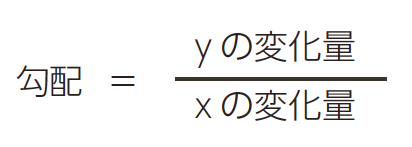

各変化量は以下の図のように隣同士の要素の差から近似的に求めます。

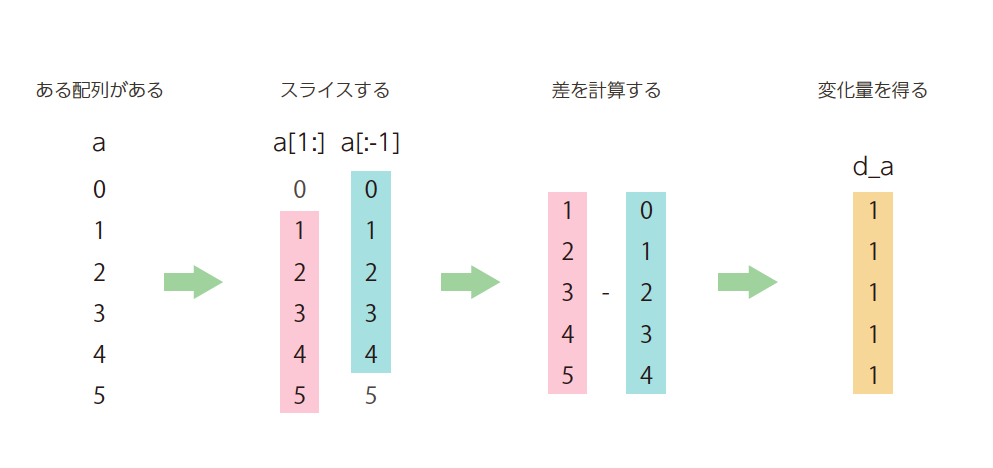

《注意》
- 厳密に各点における勾配を求めるには極限（微分）を利用する必要があります
- 勾配はx座標の間隔を使うので、xの要素数に対して一つ少なくなります

In [4]:
delta_x = array_x[1:] - array_x[:-1]
delta_y = array_y[1:] - array_y[:-1]
gradient = delta_y / delta_x

print("gradient = \n%s\n...\n" % gradient[:5])
print("gradient shape = {}".format(np.shape(gradient)))

gradient = 
[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]
...

gradient shape = (1000, 1)


### 【問題4】グラフを描く  
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

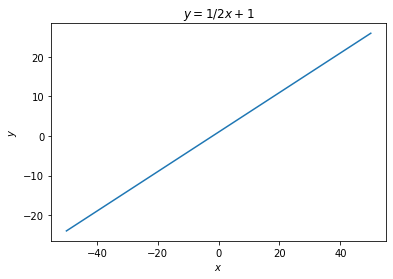

In [5]:
# 一次関数のグラフ表示
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("$y=1/2x+1$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(array_x, array_y)
plt.show()

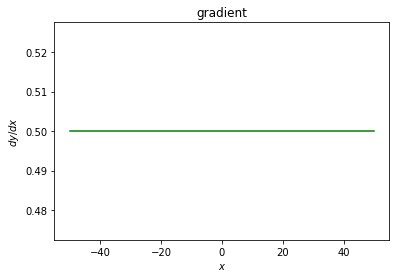

In [6]:
# 勾配のグラフ表示
# x → x+0.01 の間の平均の傾き
# x軸にはx[0]～x[999]に0.05を足したものをとる
plt.title("gradient")
plt.xlabel("$x$")
plt.ylabel("$dy/dx$")
plt.plot(array_x[:-1]+0.05, gradient, color="green")
plt.show()

### 【問題5】Pythonの関数化  
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。
そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。
$$
y=x^2 \ (-50\leq x\leq 50)\\
y=2x^2+2^x \ (-50\leq x\leq 50)\\
y=\sin(x^{\frac{1}{2}}) \ (0\leq x\leq 50)\\
$$
また、問題4と同様にグラフを描いてください。
ndarrayに対して三角関数のsinの計算を行うには ``np.sin()`` を用います。

In [7]:
# 関数化
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
  変化量を使い勾配を計算する。

  Parameters
  ----------------
  function : function
    求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
  x_range : tuple
    np.arange()の引数と同じ方法で範囲を指定する。

  Returns
  ----------------
  array_xy : ndarray, shape(n, 2)
    xとyを結合したもの。nはx_rangeに依存する。
  gradient : ndarray, shape(n-1,)
    関数の勾配。差をとるため要素は1つ減る
  """
    row_x = np.arange(x_range[0], x_range[1], x_range[2])
    array_x = row_x.reshape([-1, 1])
    array_y = function(array_x)
    array_xy = np.hstack((array_x, array_y))
    delta_x = array_x[1:] - array_x[:-1]
    delta_y = array_y[1:] - array_y[:-1]
    gradient = delta_y / delta_x
    return array_xy, gradient

# y = x^2
def function1(array_x):
    array_y = array_x**2
    return array_y

# y = 2x^2 + 2^x
def function2(array_x):
    array_y = 2*array_x**2 + 2**array_x
    return array_y

# y = sin(x^1/2)
def function3(array_x):
    array_y = np.sin(array_x**(1/2))
    return array_y

(x, y) = 
[[ -50.   2500.  ]
 [ -49.9  2490.01]
 [ -49.8  2480.04]
 ...
 [  49.8  2480.04]
 [  49.9  2490.01]
 [  50.   2500.  ]]

gradient = 
[[-99.9 -99.7 -99.5 -99.3 -99.1]]...


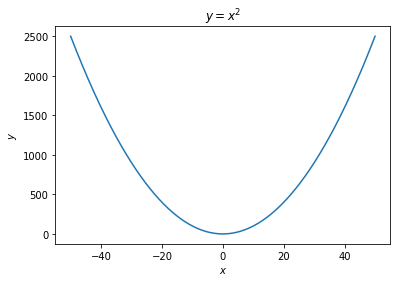

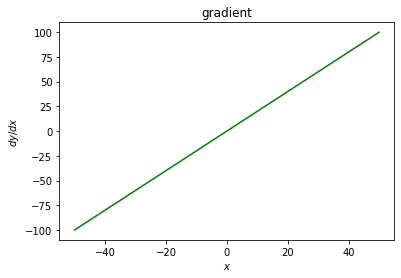

In [8]:
# y = x^2
array_xy, gradient = compute_gradient(function1, x_range=(-50, 50.1, 0.1))
array_x = array_xy[:,0]
array_y = array_xy[:,1]
print("(x, y) = \n%s\n" % array_xy)
print("gradient = \n%s..." % gradient[:5].T)

# 関数グラフ表示
plt.title("$y=x^2$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(array_x, array_y)
plt.show()

# 勾配グラフ表示
plt.title("gradient")
plt.xlabel("$x$")
plt.ylabel("$dy/dx$")
plt.plot(array_x[:-1]+0.05, gradient, color="green")
plt.show()

(x, y) = 
[[-5.00000000e+01  5.00000000e+03]
 [-4.99000000e+01  4.98002000e+03]
 [-4.98000000e+01  4.96008000e+03]
 ...
 [ 4.98000000e+01  9.80152798e+14]
 [ 4.99000000e+01  1.05050176e+15]
 [ 5.00000000e+01  1.12589991e+15]]

gradient = 
[[-199.8 -199.4 -199.  -198.6 -198.2]]...


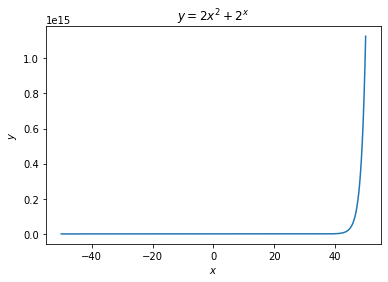

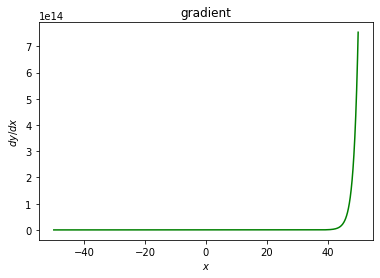

In [9]:
# y = 2x^2 + 2^x
array_xy, gradient = compute_gradient(function2, x_range=(-50, 50.1, 0.1))
array_x = array_xy[:,0]
array_y = array_xy[:,1]
print("(x, y) = \n%s\n" % array_xy)
print("gradient = \n%s..." % gradient[:5].T)

# 関数グラフ表示
plt.title("$y=2x^2 + 2^x$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(array_x, array_y)
plt.show()

# 勾配グラフ表示
plt.title("gradient")
plt.xlabel("$x$")
plt.ylabel("$dy/dx$")
plt.plot(array_x[:-1]+0.05, gradient, color="green")
plt.show()

(x, y) = 
[[ 0.          0.        ]
 [ 0.1         0.31098359]
 [ 0.2         0.43245484]
 ...
 [49.8         0.69880548]
 [49.9         0.70385354]
 [50.          0.70886129]]

gradient = 
[[3.10983593 1.21471246 0.88289461 0.70382818 0.58509822]]...


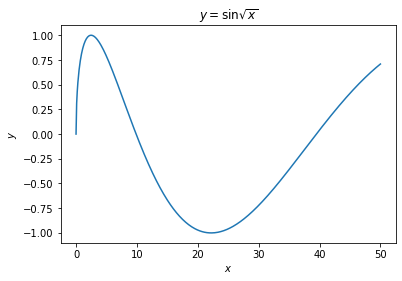

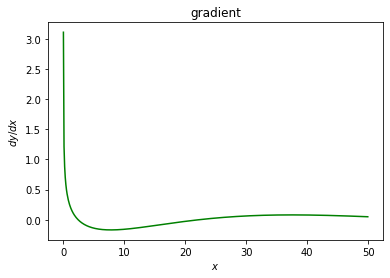

In [10]:
# y = sin(x^1/2)
array_xy, gradient = compute_gradient(function3, x_range=(0, 50.1, 0.1))
array_x = array_xy[:,0]
array_y = array_xy[:,1]
print("(x, y) = \n%s\n" % array_xy)
print("gradient = \n%s..." % gradient[:5].T)

# 関数グラフ表示
plt.title("$y=\sin\sqrt{x}$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(array_x, array_y)
plt.show()

# 勾配グラフ表示
plt.title("gradient")
plt.xlabel("$x$")
plt.ylabel("$dy/dx$")
plt.plot(array_x[:-1]+0.05, gradient, color="green")
plt.show()

### 【問題6】最小値を求める  
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。
今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。
また、最小のyをとる前後の勾配を表示してください。

In [23]:
# y = x^2
# (x,y)からxとyの最小値を求め、ｙ(2列目)のみ取り出す
array_xy, gradient = compute_gradient(function1, x_range=(-50, 50.1, 0.1))
y_min = np.min(array_xy, axis=0)[1]
y_min_index = np.argmin(array_xy, axis=0)[1]

# 最小値、インデックス、前後の勾配を出力
print("y=x^2 (-50<=x<=50)")
print("y(min) = %s" % y_min)
print("y(min) index = %s" % y_min_index)
print("gradient[499, 500, 501] = %s" 
      % gradient[y_min_index-1 : y_min_index+2].T)

y=x^2 (-50<=x<=50)
y(min) = 5.048709793414476e-25
y(min) index = 500
gradient[499, 500, 501] = [[-0.1  0.1  0.3]]


In [22]:
# y = 2x^2+2^x
# (x,y)からxとyの最小値を求め、ｙ(2列目)のみ取り出す
array_xy, gradient = compute_gradient(function2, x_range=(-50, 50.1, 0.1))
y_min = np.min(array_xy, axis=0)[1]
y_min_index = np.argmin(array_xy, axis=0)[1]

# 最小値、インデックス、前後の勾配を出力
print("y = 2x^2+2^x (-50<=x<=50)")
print("y(min) = %s" % y_min)
print("y(min) index = %s" % y_min_index)
print("gradient[499, 500, 501] = %s" 
      % gradient[y_min_index-1 : y_min_index+2].T)

y = 2x^2+2^x (-50<=x<=50)
y(min) = 0.9505505632959851
y(min) index = 498
gradient[499, 500, 501] = [[-0.41701833  0.02482428  0.46967008]]


In [24]:
# y = sin(x^1/2)
# (x,y)からxとyの最小値を求め、ｙ(2列目)のみ取り出す
array_xy, gradient = compute_gradient(function3, x_range=(0, 50.1, 0.1))
y_min = np.min(array_xy, axis=0)[1]
y_min_index = np.argmin(array_xy, axis=0)[1]

# 最小値、インデックス、前後の勾配を出力
print("y = sin(x^1/2) (0<=x<=50)")
print("y(min) = %s" % y_min)
print("y(min) index = %s" % y_min_index)
print("gradient[499, 500, 501] = %s" 
      % gradient[y_min_index-1 : y_min_index+2].T)

y = sin(x^1/2) (0<=x<=50)
y(min) = -0.9999997540298113
y(min) index = 222
gradient[499, 500, 501] = [[-0.00063884  0.00048745  0.00160612]]
